In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.2'

from algorithms.utils import restore_state_multi_agent_only_batteries
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_06-07/pomer/20250507_153117_pol_net_type_actor_critic_lr_pol_5e-05_lr_inc_0.0008_tot_timesteps_8760000_lr_sched_cosine_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent_only_batteries(directory)

{'ACTIVATION': 'tanh', 'ACTIVATION_INCENTIVE': 'tanh', 'ALPHA': 0.0, 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': False, 'temperature': True}, 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': True, 'temperature': True}, 'BATTERY_OBS_KEYS': ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus'), 'BETA_ADAM_INCENTIVES': 0.7, 'BETA_ADAM_POLICY': 0.9, 'C

In [3]:
config

{'ACTIVATION': 'tanh',
 'ACTIVATION_INCENTIVE': 'tanh',
 'ALPHA': 0.0,
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'netwo

In [4]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions': (22, 43350, 3),
 'balance_minus': (22, 43350),
 'balance_plus': (22, 43350),
 'buy_prices': (22, 43350, 3),
 'demands': (22, 43350, 3),
 'dones': {'__all__': (22, 43350),
  'battery_agent_0': (22, 43350),
  'battery_agent_1': (22, 43350),
  'battery_agent_2': (22, 43350)},
 'energy_to_batteries': (22, 43350, 3),
 'generations': (22, 43350, 3),
 'int_reward_mat': (22, 43350, 3, 3),
 'int_rewards': (22, 43350, 3),
 'norm_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'pure_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'r_tot': (22, 43350, 3),
 'self_consumption': (22, 43350),
 'sell_prices': (22, 43350, 3),
 'soc': (22, 43350, 3),
 'soh': (22, 43350, 3),
 'tot_incentives': (22, 43350),
 'weig_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': 

In [7]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43350, 3)

In [24]:
val_info['int_reward_mat'][11].sum(axis=0)

array([[200.81276, 192.69319, 183.5009 ],
       [183.87204, 183.80219, 209.33289],
       [180.3357 , 173.82101, 222.85023]], dtype=float32)

In [8]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-3348.6204, -2473.6729, -1922.2548, -1706.5159, -1633.1797,
       -1596.0071, -1528.2285, -1506.2091, -1462.7572, -1443.7288,
       -1429.0864, -1411.8535, -1442.8345, -1453.8971, -1485.3184,
       -1496.0219, -1554.1285, -1568.8865, -1594.3081, -1607.8777,
       -1621.3855, -1632.0638], dtype=float32)

In [9]:
val_info['r_tot'].shape

(22, 43350, 3)

In [10]:
val_info['r_tot'][9, :].sum(axis=0)

array([-615.74634, -400.71454, -427.26743], dtype=float32)

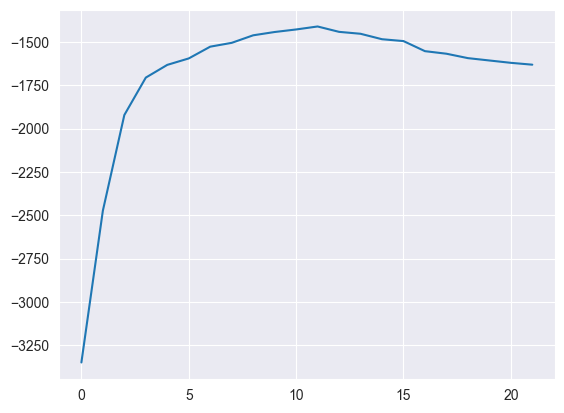

In [11]:
plt.plot(a)

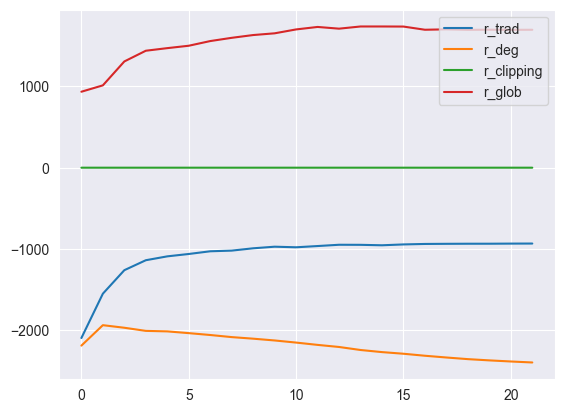

In [12]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [13]:
val_info['weig_reward']['r_trad'].shape

(22, 43350, 3)

In [14]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

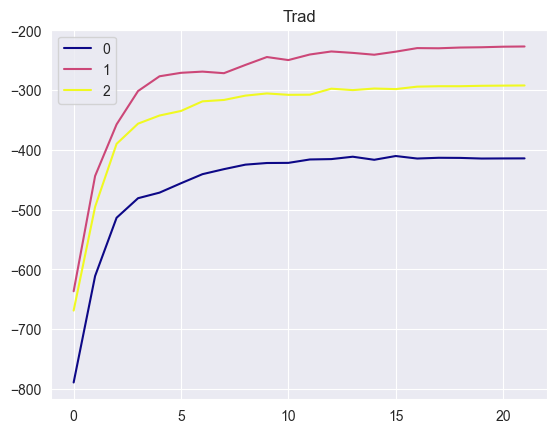

In [15]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

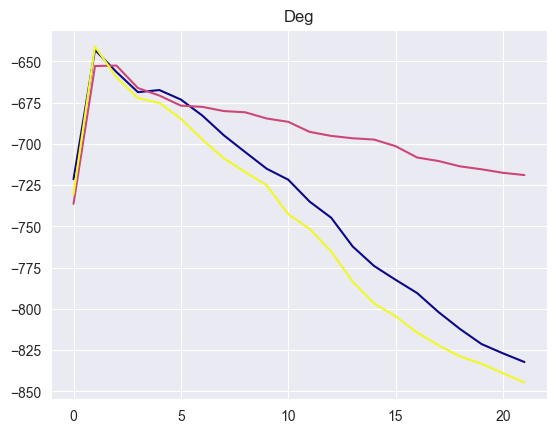

In [16]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

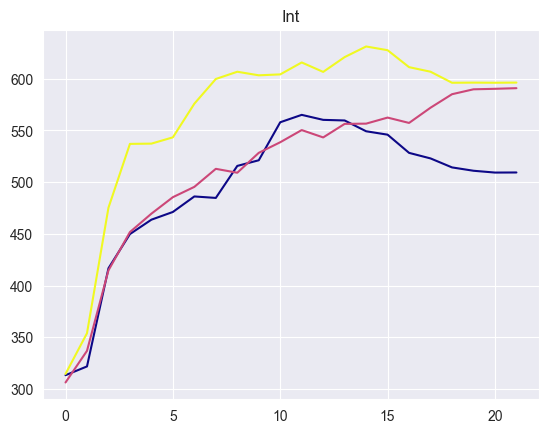

In [17]:
for i in range(n_agents):
    plt.plot(val_info['int_rewards'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Int')

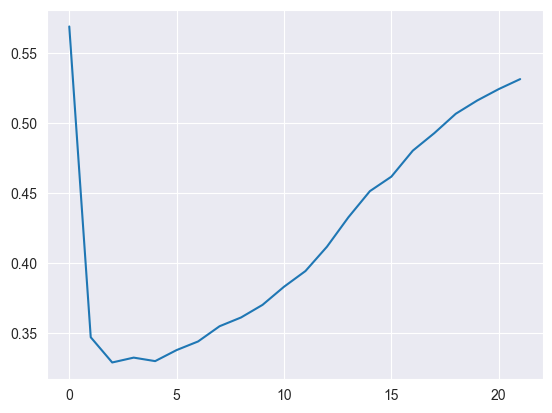

In [18]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [19]:
val_info['self_consumption'].sum(axis=1)

array([5039557.5, 5469984. , 7090616. , 7825610. , 7993159. , 8154314.5,
       8462815. , 8683307. , 8863460. , 8971424. , 9230180. , 9392614. ,
       9274412. , 9415523. , 9403652. , 9401488. , 9182364. , 9208787. ,
       9173208. , 9181614. , 9174270. , 9178897. ], dtype=float32)

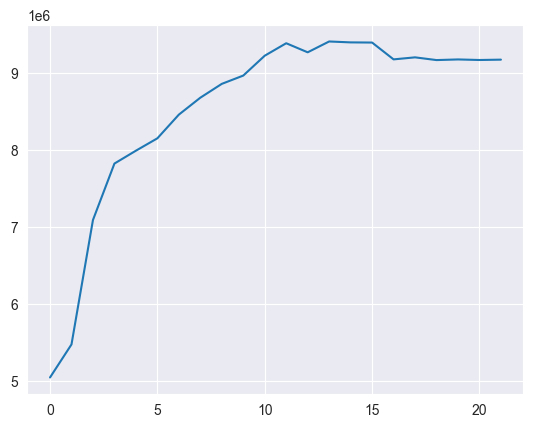

In [20]:
plt.plot(val_info['self_consumption'].sum(axis=1))